In [1]:
import os

try:
    snakemake
except NameError:
    from snakemk_util import load_rule_args
    
    os.chdir('../..')
    
    snakemake = load_rule_args(
        snakefile = os.getcwd() + "/workflow/Snakefile",
        rule_name = 'cage_benchmark',
        root = '..'
    )

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from pathlib import Path

df_benchmark = list()

for i in map(Path, snakemake.input['pr']):
    df_benchmark.append(pd.read_csv(i).assign(sample=i.name.replace('.csv', '').replace('pr_curve_', '')))
    
df_benchmark = pd.concat(df_benchmark)

In [4]:
df_benchmark

,Unnamed: 0,Precision,Recall,sample
0,0,0.000000,1.000000,imr90
1,1,0.491519,0.554712,imr90
2,2,0.586134,0.519274,imr90
3,3,0.637368,0.489038,imr90
4,4,0.672535,0.466263,imr90
...,...,...,...,...
1737,1737,1.000000,0.000284,K562
1738,1738,1.000000,0.000221,K562
1739,1739,1.000000,0.000126,K562
1740,1740,1.000000,0.000032,K562


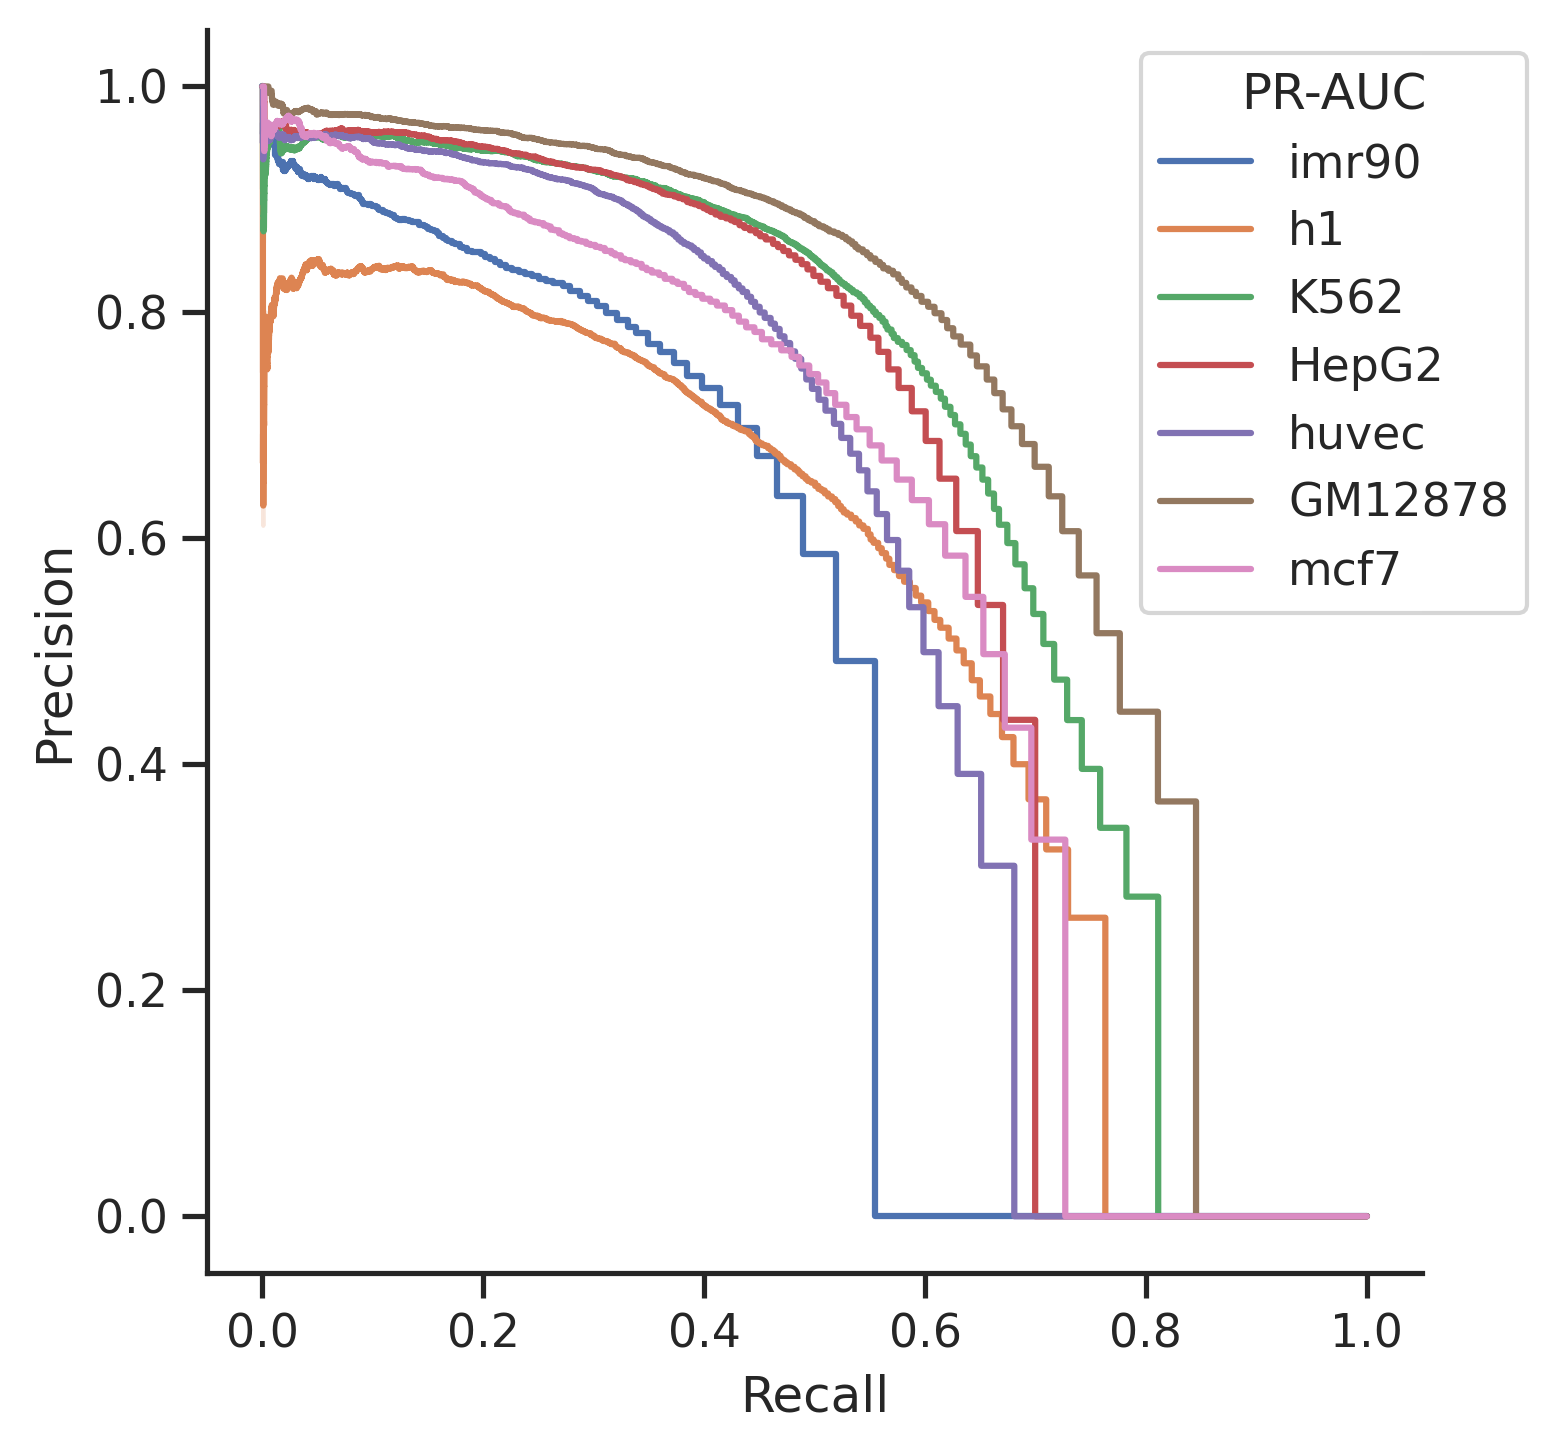

In [5]:
plt.figure(figsize=(5, 5), dpi=300)

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

sns.lineplot(data=df_benchmark.drop_duplicates(['Precision', 'Recall', 'sample']).reset_index(), 
             y='Precision', x='Recall', hue='sample', drawstyle='steps-pre')

plt.legend()._legend_box.align='right'

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.tight_layout()
plt.legend(bbox_to_anchor=(0.75, 1.), loc='upper left', title='PR-AUC')